In [ ]:
import pandas as pd
import re
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
file_path = "/content/olid-training-v1.0.xlsx"
df = pd.read_excel(file_path)
df.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home youâ€™re drunk!!! @USER #M...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [ ]:
df.isnull()

,id,tweet,subtask_a,subtask_b,subtask_c
0,False,False,False,False,True
1,False,False,False,False,False
2,False,False,False,True,True
3,False,False,False,False,True
4,False,False,False,True,True
...,...,...,...,...,...
13235,False,False,False,False,False
13236,False,False,False,True,True
13237,False,False,False,False,False
13238,False,False,False,False,True


In [ ]:
def missing_values(df):
    """
    This function checks for missing values in the dataset and prints
    the count of missing values in each column.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check for missing values

    Returns:
    None
    """
    print("\nMissing Values in Each Column:")
    print(df.isnull().sum())

# Counting rows before dropping missing tweets
initial_rows = df.shape[0]
missing_values(df)


Missing Values in Each Column:
id              0
tweet           6
subtask_a       0
subtask_b    8840
subtask_c    9364
dtype: int64


In [ ]:
# Drop rows where 'tweet' column is missing
df = df.dropna(subset=['tweet'])

# Count rows after dropping missing tweets
final_rows = df.shape[0]
dropped_rows = initial_rows - final_rows

print(f"\nDropped {dropped_rows} rows due to missing tweets.")
print("\nAfter Dropping Missing Tweets:")
df.info()


Dropped 6 rows due to missing tweets.

After Dropping Missing Tweets:
<class 'pandas.core.frame.DataFrame'>
Index: 13234 entries, 0 to 13239
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         13234 non-null  int64 
 1   tweet      13234 non-null  object
 2   subtask_a  13234 non-null  object
 3   subtask_b  4400 non-null   object
 4   subtask_c  3876 non-null   object
dtypes: int64(1), object(4)
memory usage: 620.3+ KB


In [ ]:

# Function to clean and preprocess the text
def clean_text(text):
    """
    This function cleans the input text by:
    - Converting to lowercase
    - Removing URLs
    - Removing mentions
    - Removing special characters and numbers
    - Removing extra spaces

    Parameters:
    text (str): The text to be cleaned

    Returns:
    str: The cleaned text
    """
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply the text cleaning function to the 'tweet' column
df['clean_tweet'] = df['tweet'].apply(clean_text)

# Display first few cleaned tweets
print("\nCleaned Tweets:")
print(df[['tweet', 'clean_tweet']].head())


Cleaned Tweets:
                                               tweet  \
0  @USER She should ask a few native Americans wh...   
1  @USER @USER Go home youâ€™re drunk!!! @USER #M...   
2  Amazon is investigating Chinese employees who ...   
3  @USER Someone should'veTaken" this piece of sh...   
4  @USER @USER Obama wanted liberals &amp; illega...   

                                         clean_tweet  
0  she should ask a few native americans what the...  
1                 go home youre drunk maga trump url  
2  amazon is investigating chinese employees who ...  
3  someone shouldvetaken this piece of shit to a ...  
4  obama wanted liberals amp illegals to move int...  


In [ ]:
# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to 5000 for efficiency
X = vectorizer.fit_transform(df['clean_tweet'])

# Encode labels (OFF = 1, NOT = 0)
y = df['subtask_a'].map({'OFF': 1, 'NOT': 0})

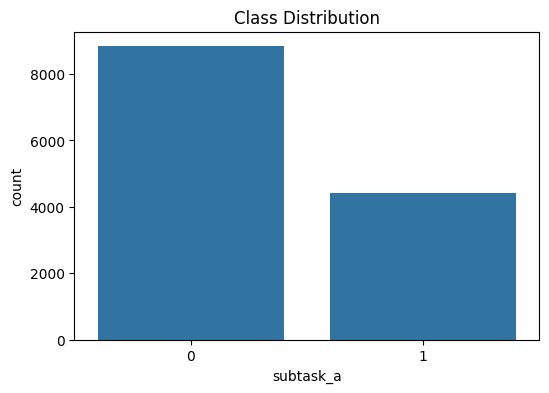


Label Distribution:
 subtask_a
0    8834
1    4400
Name: count, dtype: int64


In [ ]:
# Checking for Class Imbalance
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

# Print label counts
print("\nLabel Distribution:\n", y.value_counts())


In [ ]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTF-IDF feature extraction complete. Data is ready for model training.")



TF-IDF feature extraction complete. Data is ready for model training.


In [ ]:
# Train Machine Learning Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naïve Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



Training Logistic Regression...
Accuracy: 0.7575
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84      1767
           1       0.79      0.37      0.50       880

    accuracy                           0.76      2647
   macro avg       0.77      0.66      0.67      2647
weighted avg       0.76      0.76      0.73      2647


Training Naïve Bayes...
Accuracy: 0.7291
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.83      1767
           1       0.82      0.24      0.37       880

    accuracy                           0.73      2647
   macro avg       0.77      0.61      0.60      2647
weighted avg       0.75      0.73      0.68      2647


Training Support Vector Machine...
Accuracy: 0.7567
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.84      1767
           1       0.83

In [ ]:
# Handling class imbalance with Class Weighting
# Compute class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Models supporting class_weight
weighted_models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced"),
    "Support Vector Machine": SVC(class_weight="balanced"),
    "Random Forest": RandomForestClassifier(class_weight="balanced"),
    "XGBoost": XGBClassifier(scale_pos_weight=class_weights[1] / class_weights[0])  # Equivalent of class_weight for XGB
}

# Train and evaluate models with class weighting
for name, model in weighted_models.items():
    print(f"\nTraining {name} with Class Weighting...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Training Logistic Regression with Class Weighting...
Accuracy: 0.7435
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1767
           1       0.61      0.63      0.62       880

    accuracy                           0.74      2647
   macro avg       0.71      0.71      0.71      2647
weighted avg       0.75      0.74      0.74      2647


Training Support Vector Machine with Class Weighting...
Accuracy: 0.7567
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1767
           1       0.67      0.54      0.59       880

    accuracy                           0.76      2647
   macro avg       0.73      0.70      0.71      2647
weighted avg       0.75      0.76      0.75      2647


Training Random Forest with Class Weighting...
Accuracy: 0.7590
Classification Report:
              precision    recall  f1-score   support

           0

In [ ]:
# Handling class imbalance with SMOTE
# Apply SMOTE on Training Data (Only on Training Set)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Models on SMOTE Data (Same Models)
smote_models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and Evaluate Each Model
for name, model in smote_models.items():
    print(f"\nTraining {name} with SMOTE...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Training Logistic Regression with SMOTE...
Accuracy: 0.6959
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1767
           1       0.54      0.59      0.56       880

    accuracy                           0.70      2647
   macro avg       0.66      0.67      0.66      2647
weighted avg       0.70      0.70      0.70      2647


Training Support Vector Machine with SMOTE...
Accuracy: 0.7473
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83      1767
           1       0.74      0.37      0.50       880

    accuracy                           0.75      2647
   macro avg       0.74      0.65      0.66      2647
weighted avg       0.75      0.75      0.72      2647


Training Random Forest with SMOTE...
Accuracy: 0.7325
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.91      0.8

<Figure size 800x500 with 0 Axes>

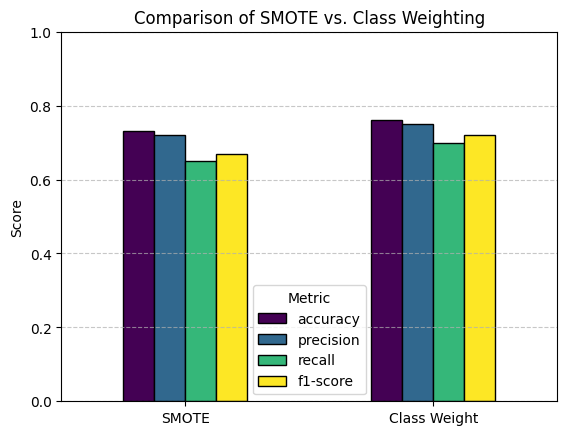

In [ ]:
# Updated metrics based on classification reports
smote_metrics = {'accuracy': 0.73, 'precision': 0.72, 'recall': 0.65, 'f1-score': 0.67}
class_weight_metrics = {'accuracy': 0.76, 'precision': 0.75, 'recall': 0.70, 'f1-score': 0.72}

# Convert to DataFrame for visualization
metrics_df = pd.DataFrame([smote_metrics, class_weight_metrics], index=['SMOTE', 'Class Weight'])

# Plot the comparison
plt.figure(figsize=(8, 5))
metrics_df.plot(kind='bar', rot=0, cmap='viridis', edgecolor='black')
plt.title('Comparison of SMOTE vs. Class Weighting')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



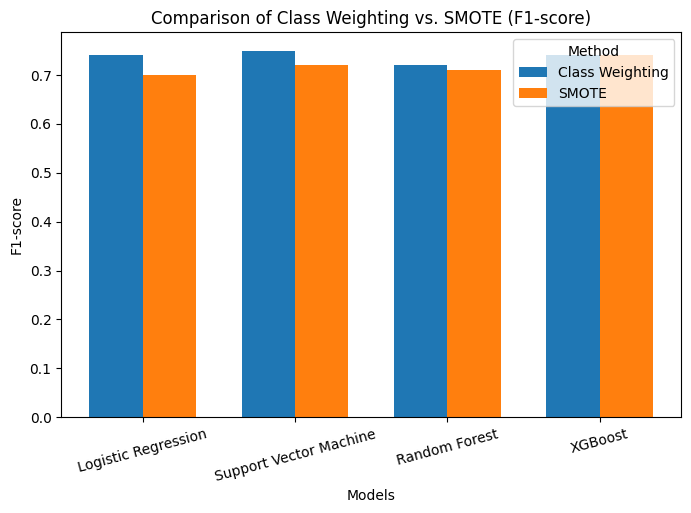

In [ ]:
# Extracted F1-scores from your classification reports
models = ["Logistic Regression", "Support Vector Machine", "Random Forest", "XGBoost"]
f1_class_weighting = [0.74, 0.75, 0.72, 0.74]  # Updated values
f1_smote = [0.70, 0.72, 0.71, 0.74]  # Updated values

x = np.arange(len(models))  # Label locations
width = 0.35  # Width of bars

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, f1_class_weighting, width, label="Class Weighting")
bars2 = ax.bar(x + width/2, f1_smote, width, label="SMOTE")

# Labels and formatting
ax.set_xlabel("Models")
ax.set_ylabel("F1-score")
ax.set_title("Comparison of Class Weighting vs. SMOTE (F1-score)")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.legend(title="Method")

# Display the plot
plt.show()



Training Logistic Regression...

Evaluating Logistic Regression...
Evaluating Logistic Regression with probability-based metrics.


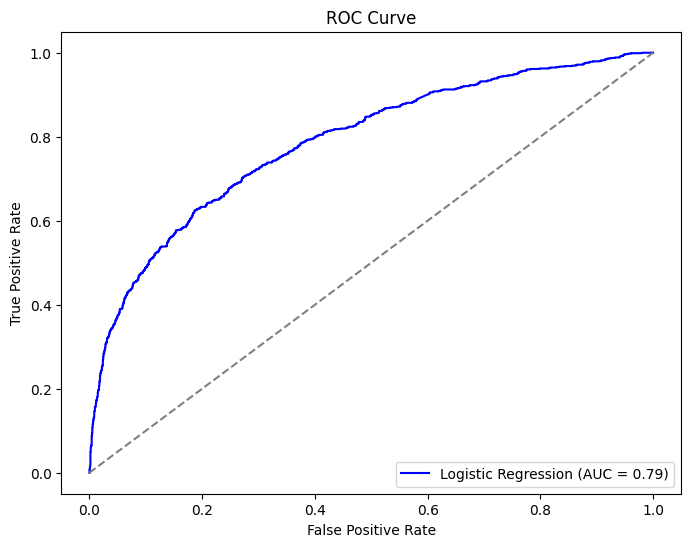

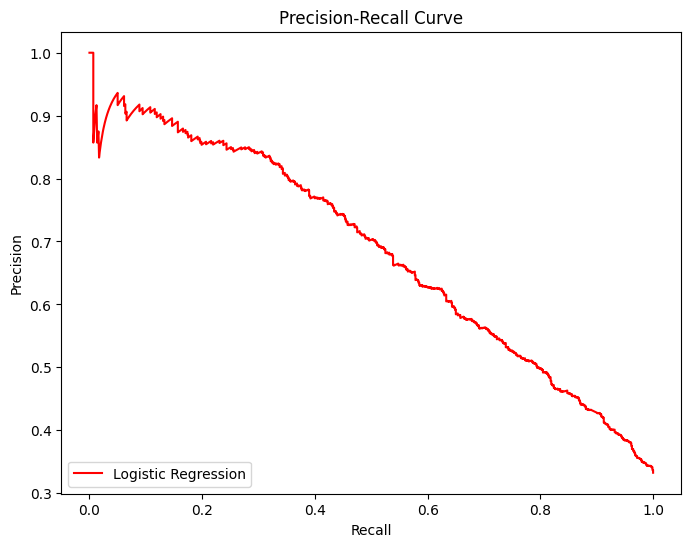

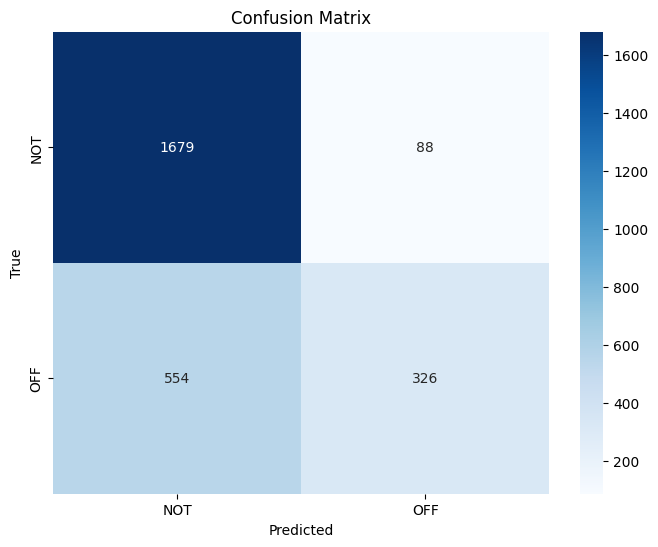

Finished evaluating Logistic Regression.

Training Naïve Bayes...

Evaluating Naïve Bayes...
Evaluating Naïve Bayes with probability-based metrics.


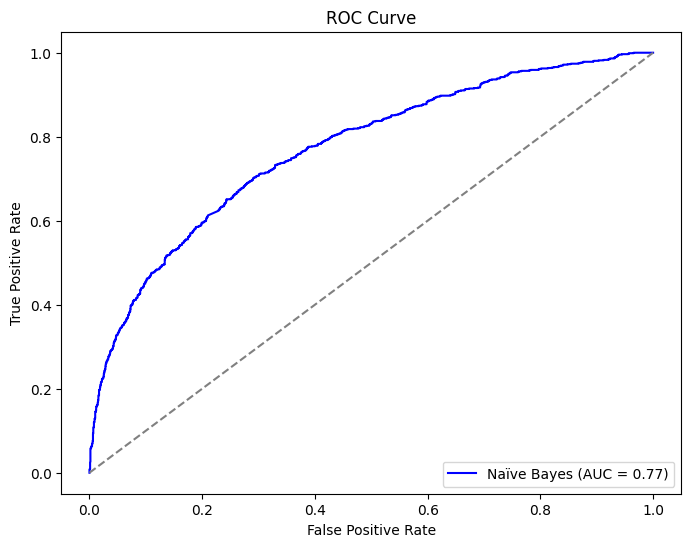

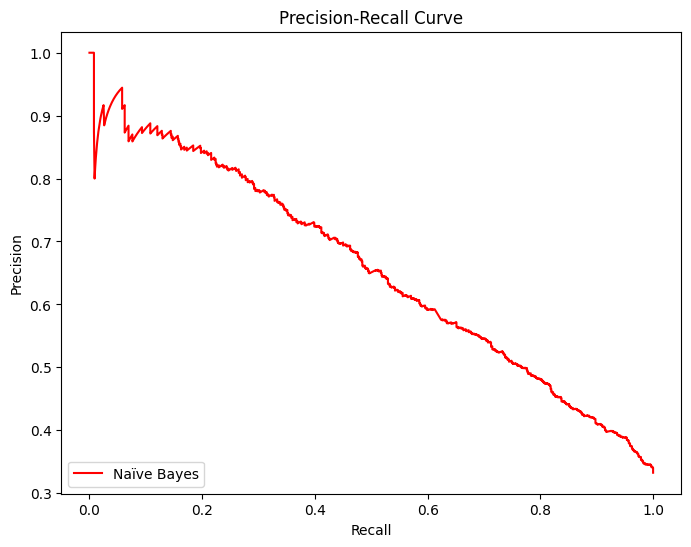

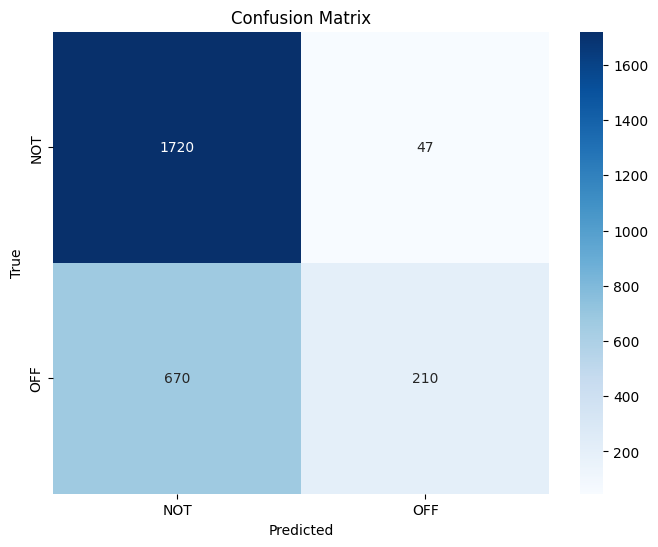

Finished evaluating Naïve Bayes.

Training Support Vector Machine...

Evaluating Support Vector Machine...
Evaluating Support Vector Machine with probability-based metrics.


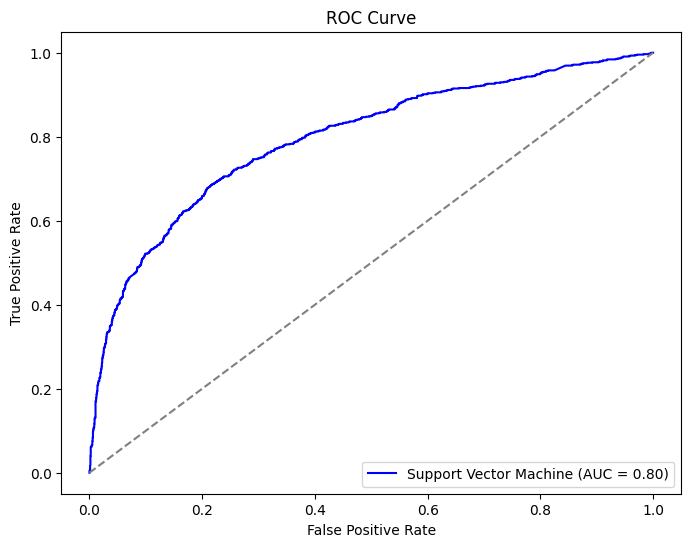

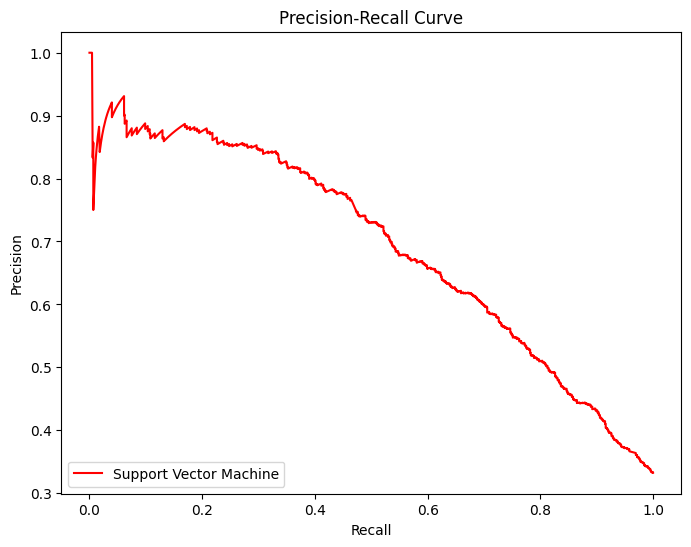

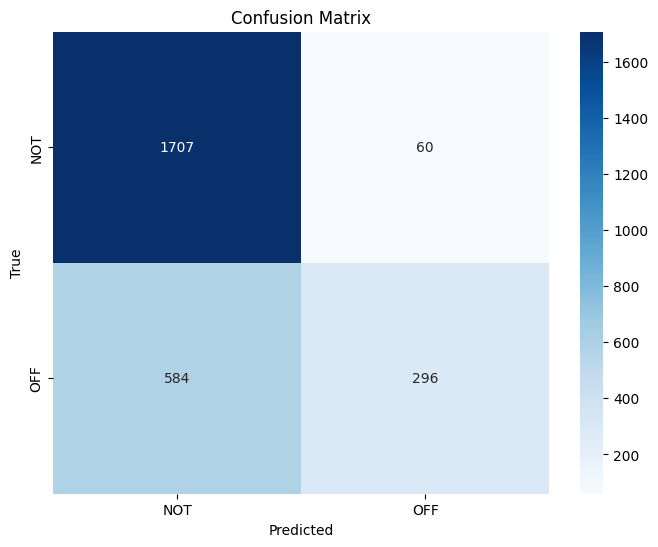

Finished evaluating Support Vector Machine.

Training Random Forest...

Evaluating Random Forest...
Evaluating Random Forest with probability-based metrics.


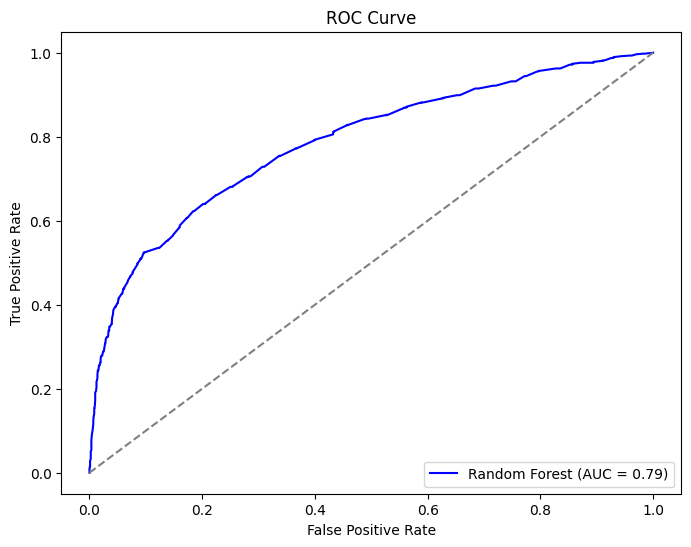

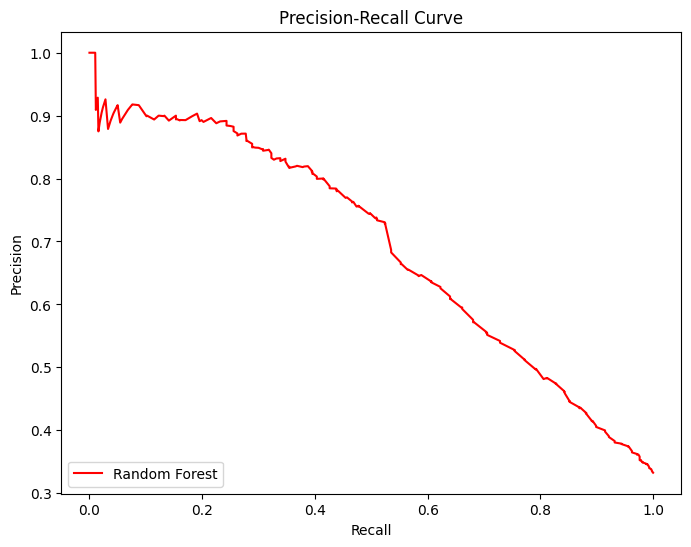

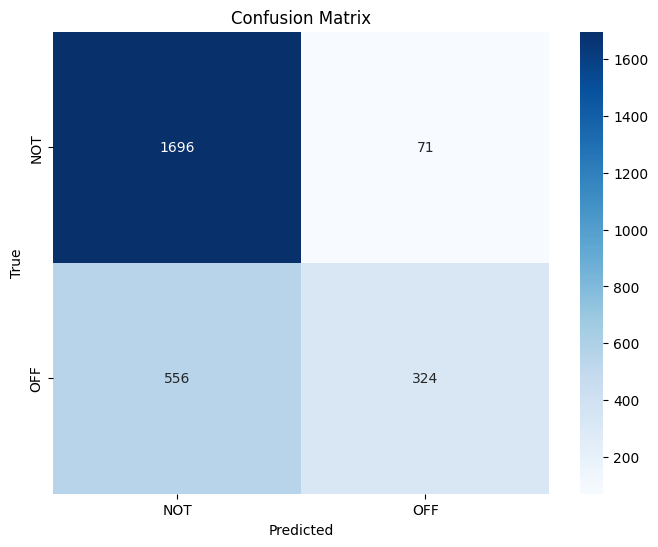

Finished evaluating Random Forest.

Training XGBoost...

Evaluating XGBoost...
Evaluating XGBoost with probability-based metrics.


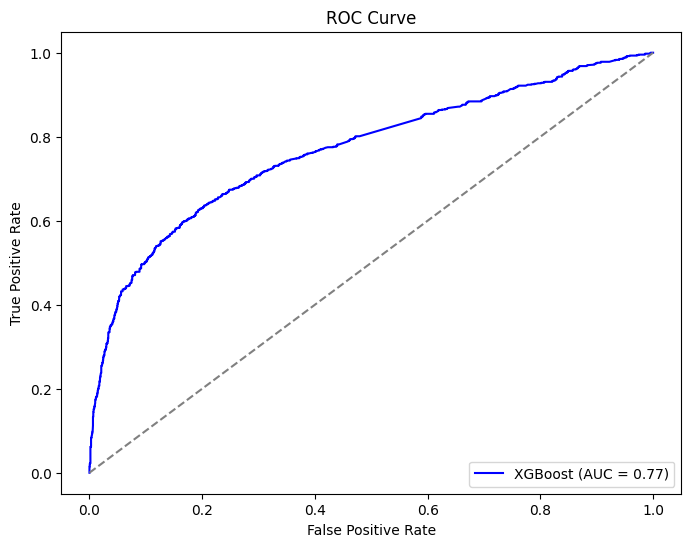

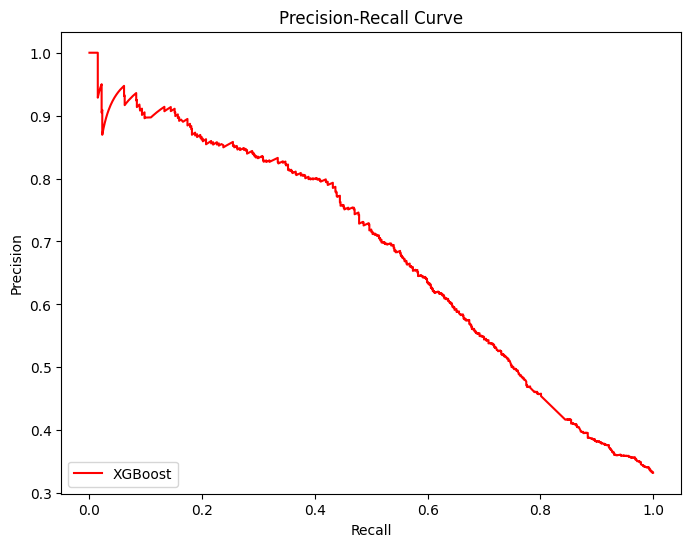

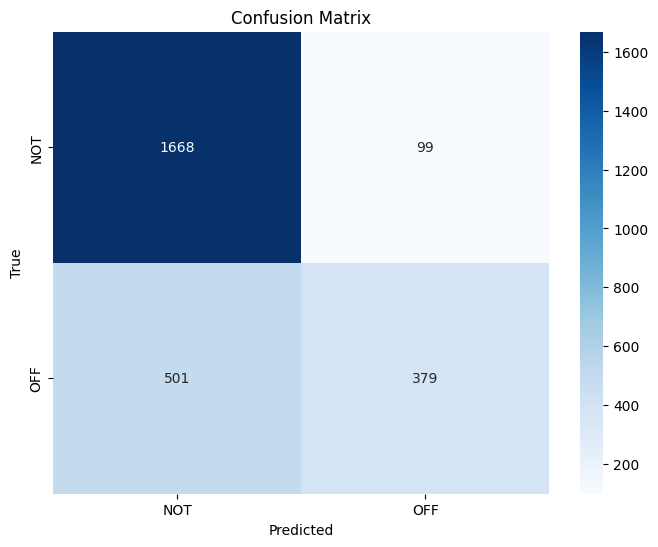

Finished evaluating XGBoost.


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Update SVC model to include probability=True
models = {
    "Logistic Regression": LogisticRegression(),
    "Naïve Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(probability=True),  # Set probability=True here
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Function to check if the model supports predict_proba
def supports_predict_proba(model):
    return hasattr(model, "predict_proba")

# Evaluate model with ROC AUC and ROC Curve
def plot_roc_curve(model, X_test, y_test, model_name):
    if supports_predict_proba(model):
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc_score = roc_auc_score(y_test, y_prob)

        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, color='b', label=f'{model_name} (AUC = {auc_score:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

        return auc_score
    else:
        print(f"{model_name} does not support predict_proba.")
        return None

# Evaluate model with Precision-Recall Curve
def plot_precision_recall_curve(model, X_test, y_test, model_name):
    if supports_predict_proba(model):
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
        precision, recall, _ = precision_recall_curve(y_test, y_prob)

        plt.figure(figsize=(8,6))
        plt.plot(recall, precision, color='r', label=f'{model_name}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc='lower left')
        plt.show()
    else:
        print(f"{model_name} does not support predict_proba.")

# Confusion Matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NOT', 'OFF'], yticklabels=['NOT', 'OFF'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Train models before evaluating them
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Ensure the model is fitted properly
    model.fit(X_train, y_train)  # This is the key step!

    print(f"\nEvaluating {name}...")

    # Ensure each model is trained before evaluating it
    if hasattr(model, "predict_proba"):
        print(f"Evaluating {name} with probability-based metrics.")
        plot_roc_curve(model, X_test, y_test, name)
        plot_precision_recall_curve(model, X_test, y_test, name)
    else:
        print(f"{name} does not support probability-based evaluation.")

    plot_confusion_matrix(model, X_test, y_test)
    print(f"Finished evaluating {name}.")
